<a href="https://colab.research.google.com/github/entc-17-fyp-20/WPF_Data_Visualization/blob/Kusal/RNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **One step univariate model**

In [49]:
import os
import warnings
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import datetime as dt
from collections import UserDict
from sklearn.preprocessing import MinMaxScaler
from IPython.display import Image
%matplotlib inline
import plotly.express as px
import io


pd.options.display.float_format = '{:,.2f}'.format
np.set_printoptions(precision=2)
warnings.filterwarnings("ignore")

url1 = 'https://raw.githubusercontent.com/entc-17-fyp-20/Datasets/main/S6%2010%20seconed%20data.csv' #S6 10 seconed data.csv
url2 = 'https://raw.githubusercontent.com/entc-17-fyp-20/Datasets/main/AE59_1.csv' #AE59_1
url3 = 'https://raw.githubusercontent.com/entc-17-fyp-20/Datasets/main/AE59_2.csv' #AE59_2
url4 = 'https://raw.githubusercontent.com/entc-17-fyp-20/Datasets/main/V08%20June%2010%20sec%20data.csv' #V08 June 10 sec data.csv; does not contain current columns
url5 = 'https://raw.githubusercontent.com/entc-17-fyp-20/Datasets/main/V13%20June%2010%20sec%20data.csv' #V13 June 10 sec data.csv
url6 = 'https://raw.githubusercontent.com/entc-17-fyp-20/Datasets/main/V08%20July%2010%20sec%20data.csv' #V08 July 10 sec data.csv
url7 = 'https://raw.githubusercontent.com/entc-17-fyp-20/Datasets/main/V13%20July%2010%20sec%20data.csv' #V13 July 10 sec data.csv
url8 = 'https://raw.githubusercontent.com/entc-17-fyp-20/Datasets/main/Mannar.csv'  #Mannar dataset-10_min-wind_speed.csv
df = pd.read_csv(url8)

In [50]:
df=pd.DataFrame(df)
#df.rename(columns = {'Average Wind Speed (m/s)':'avg_wind_speed'}, inplace = True)
df

,Date & Time,Average Wind Speed (m/s)
0,8/1/2021,10.66
1,8/1/2021 0:10,10.71
2,8/1/2021 0:20,10.53
3,8/1/2021 0:30,10.20
4,8/1/2021 0:40,10.34
...,...,...
4404,8/31/2021 23:20,11.62
4405,8/31/2021 23:30,11.16
4406,8/31/2021 23:40,10.66
4407,8/31/2021 23:50,10.90


In [51]:
df['Date & Time'][0]="8/1/2021 0:00"
df['Date & Time'][4408]="9/1/2021  0:00"
df


,Date & Time,Average Wind Speed (m/s)
0,8/1/2021 0:00,10.66
1,8/1/2021 0:10,10.71
2,8/1/2021 0:20,10.53
3,8/1/2021 0:30,10.20
4,8/1/2021 0:40,10.34
...,...,...
4404,8/31/2021 23:20,11.62
4405,8/31/2021 23:30,11.16
4406,8/31/2021 23:40,10.66
4407,8/31/2021 23:50,10.90


In [52]:
df=df.set_index('Date & Time')
df

,Average Wind Speed (m/s)
Date & Time,
8/1/2021 0:00,10.66
8/1/2021 0:10,10.71
8/1/2021 0:20,10.53
8/1/2021 0:30,10.20
8/1/2021 0:40,10.34
...,...
8/31/2021 23:20,11.62
8/31/2021 23:30,11.16
8/31/2021 23:40,10.66


# **Train, validation and test sets**

In [17]:
train,valid,test=df[:4209],df[4209:4309],df[4309:4409]  #seperate train and test data arrays
print(train.shape)
print(valid.shape)
print(test.shape)

print(train.describe())
print(valid.describe())
print(test.describe())

(4209, 1)
(100, 1)
(100, 1)
       Average Wind Speed (m/s)
count                  4,209.00
mean                       9.96
std                        2.63
min                        1.81
25%                        8.15
50%                       10.10
75%                       11.92
max                       16.45
       Average Wind Speed (m/s)
count                    100.00
mean                       9.23
std                        1.09
min                        7.13
25%                        8.34
50%                        9.07
75%                       10.14
max                       11.31
       Average Wind Speed (m/s)
count                    100.00
mean                      10.57
std                        1.25
min                        8.68
25%                        9.25
50%                       10.59
75%                       11.86
max                       12.50


In [18]:
fig = px.line(df,x=df.index, y="Average Wind Speed (m/s)") 
fig.show()

In [19]:
print(train)

                 Average Wind Speed (m/s)
Date & Time                              
8/1/2021 0:00                       10.66
8/1/2021 0:10                       10.71
8/1/2021 0:20                       10.53
8/1/2021 0:30                       10.20
8/1/2021 0:40                       10.34
...                                   ...
8/30/2021 14:00                      9.95
8/30/2021 14:10                     10.46
8/30/2021 14:20                     10.24
8/30/2021 14:30                     10.15
8/30/2021 14:40                     10.15

[4209 rows x 1 columns]


# **Data preparation**

In [20]:
T = 6
HORIZON = 1

**Data preparation - Training data**

In [21]:
scaler = MinMaxScaler()
train=pd.DataFrame(train["Average Wind Speed (m/s)"])
train["Average Wind Speed (m/s)"] = scaler.fit_transform(train)

train_shifted = train.copy()
train_shifted['y_t+1'] = train_shifted["Average Wind Speed (m/s)"].shift(-1)
train_shifted.head(10)

,Average Wind Speed (m/s),y_t+1
Date & Time,,
8/1/2021 0:00,0.60,0.61
8/1/2021 0:10,0.61,0.60
8/1/2021 0:20,0.60,0.57
8/1/2021 0:30,0.57,0.58
8/1/2021 0:40,0.58,0.59
8/1/2021 0:50,0.59,0.60
8/1/2021 1:00,0.60,0.62
8/1/2021 1:10,0.62,0.62
8/1/2021 1:20,0.62,0.61


In [22]:
'''for t in range(1, T+1):
    train_shifted[str(T-t)] = train_shifted['Average Wind Speed (m/s)'].shift(T-t, freq='H')
y_col = 'y_t+1'
X_cols = ['wind_speed_t-5',
             'wind_speed_t-4',
             'wind_speed_t-3',
             'wind_speed_t-2',
             'wind_speed_t-1',
             'wind_speed_t']
train_shifted.columns = ['original_wind_speed']+[y_col]+X_cols'''
for t in range(1, T+1):
    train_shifted['wind_speed_t-'+str(T-t)] = train_shifted["Average Wind Speed (m/s)"].shift(T-t)
train_shifted = train_shifted.rename(columns={"Average Wind Speed (m/s)":'Original_wind_speed'})
train_shifted
# 4.Discard any samples with missing values
train_shifted = train_shifted.dropna(how='any')
train_shifted.head(10)

,Original_wind_speed,y_t+1,wind_speed_t-5,wind_speed_t-4,wind_speed_t-3,wind_speed_t-2,wind_speed_t-1,wind_speed_t-0
Date & Time,,,,,,,,
8/1/2021 0:50,0.59,0.60,0.60,0.61,0.60,0.57,0.58,0.59
8/1/2021 1:00,0.60,0.62,0.61,0.60,0.57,0.58,0.59,0.60
8/1/2021 1:10,0.62,0.62,0.60,0.57,0.58,0.59,0.60,0.62
8/1/2021 1:20,0.62,0.61,0.57,0.58,0.59,0.60,0.62,0.62
8/1/2021 1:30,0.61,0.61,0.58,0.59,0.60,0.62,0.62,0.61
8/1/2021 1:40,0.61,0.61,0.59,0.60,0.62,0.62,0.61,0.61
8/1/2021 1:50,0.61,0.63,0.60,0.62,0.62,0.61,0.61,0.61
8/1/2021 2:00,0.63,0.65,0.62,0.62,0.61,0.61,0.61,0.63
8/1/2021 2:10,0.65,0.66,0.62,0.61,0.61,0.61,0.63,0.65


In [28]:
y_train = np.array(train_shifted["y_t+1"])
X_train=np.array(train_shifted[['wind_speed_t-'+str(T-t) for t in range(1, T+1)]])

In [29]:
# This is an important step to reshape the X into 3 dimension array
X_train = X_train.reshape(X_train.shape[0], T, 1)

In [30]:
y_train.shape

(4203,)

In [31]:
y_train[:3]

array([0.6 , 0.62, 0.62])

In [32]:
X_train.shape

(4203, 6, 1)

In [33]:
X_train[:3]

array([[[0.6 ],
        [0.61],
        [0.6 ],
        [0.57],
        [0.58],
        [0.59]],

       [[0.61],
        [0.6 ],
        [0.57],
        [0.58],
        [0.59],
        [0.6 ]],

       [[0.6 ],
        [0.57],
        [0.58],
        [0.59],
        [0.6 ],
        [0.62]]])

In [34]:
train_shifted.head(3)

,Original_wind_speed,y_t+1,wind_speed_t-5,wind_speed_t-4,wind_speed_t-3,wind_speed_t-2,wind_speed_t-1,wind_speed_t-0
Date & Time,,,,,,,,
8/1/2021 0:50,0.59,0.60,0.60,0.61,0.60,0.57,0.58,0.59
8/1/2021 1:00,0.60,0.62,0.61,0.60,0.57,0.58,0.59,0.60
8/1/2021 1:10,0.62,0.62,0.60,0.57,0.58,0.59,0.60,0.62


**Data preparation - Validation data**

In [35]:
valid=pd.DataFrame(valid["Average Wind Speed (m/s)"])
valid

,Average Wind Speed (m/s)
Date & Time,
8/30/2021 14:50,9.67
8/30/2021 15:00,9.38
8/30/2021 15:10,9.16
8/30/2021 15:20,8.99
8/30/2021 15:30,9.27
...,...
8/31/2021 6:40,8.18
8/31/2021 6:50,8.01
8/31/2021 7:00,8.10


In [36]:
valid_new=df[4209-T+1:4309]
valid_new=pd.DataFrame(valid_new["Average Wind Speed (m/s)"])
valid_new.head(20)

,Average Wind Speed (m/s)
Date & Time,
8/30/2021 14:00,9.95
8/30/2021 14:10,10.46
8/30/2021 14:20,10.24
8/30/2021 14:30,10.15
8/30/2021 14:40,10.15
8/30/2021 14:50,9.67
8/30/2021 15:00,9.38
8/30/2021 15:10,9.16
8/30/2021 15:20,8.99


In [37]:
valid_new['Average Wind Speed (m/s)']=scaler.transform(valid_new)
valid_new.head()

,Average Wind Speed (m/s)
Date & Time,
8/30/2021 14:00,0.56
8/30/2021 14:10,0.59
8/30/2021 14:20,0.58
8/30/2021 14:30,0.57
8/30/2021 14:40,0.57


In [44]:
valid_shifted = valid_new.copy() 
valid_shifted['y_t+1'] = valid_shifted["Average Wind Speed (m/s)"].shift(-1)
valid_shifted.head(10)

for t in range(1, T+1):
    valid_shifted['wind_speed_t-'+str(T-t)] = valid_shifted["Average Wind Speed (m/s)"].shift(T-t)
vali_shifted = valid_shifted.rename(columns={"Average Wind Speed (m/s)":'Original_wind_speed'})

valid_shifted = valid_shifted.dropna(how='any')
print(valid_shifted)
y_valid = np.array(valid_shifted["y_t+1"])
X_valid=np.array(valid_shifted[['wind_speed_t-'+str(T-t) for t in range(1, T+1)]])
X_valid = X_valid.reshape(X_valid.shape[0], T, 1)

                 Average Wind Speed (m/s)  ...  wind_speed_t-0
Date & Time                                ...                
8/30/2021 14:50                      0.54  ...            0.54
8/30/2021 15:00                      0.52  ...            0.52
8/30/2021 15:10                      0.50  ...            0.50
8/30/2021 15:20                      0.49  ...            0.49
8/30/2021 15:30                      0.51  ...            0.51
...                                   ...  ...             ...
8/31/2021 6:30                       0.45  ...            0.45
8/31/2021 6:40                       0.44  ...            0.44
8/31/2021 6:50                       0.42  ...            0.42
8/31/2021 7:00                       0.43  ...            0.43
8/31/2021 7:10                       0.45  ...            0.45

[99 rows x 8 columns]


In [45]:
y_valid.shape

(99,)

In [46]:
y_valid[:3]

array([0.52, 0.5 , 0.49])

In [47]:
X_valid.shape

(99, 6, 1)

In [48]:
X_valid[:3]

array([[[0.56],
        [0.59],
        [0.58],
        [0.57],
        [0.57],
        [0.54]],

       [[0.59],
        [0.58],
        [0.57],
        [0.57],
        [0.54],
        [0.52]],

       [[0.58],
        [0.57],
        [0.57],
        [0.54],
        [0.52],
        [0.5 ]]])

# **Implement the RNN**

In [55]:
from keras.models import Model, Sequential
from keras.layers import GRU, Dense
from keras.callbacks import EarlyStopping

In [56]:
LATENT_DIM = 5 # number of units in the RNN layer
BATCH_SIZE = 32 # number of samples per mini-batch
EPOCHS = 10 # maximum number of times the training algorithm will cycle through all samples

In [57]:
model = Sequential()
model.add(GRU(LATENT_DIM, input_shape=(T, 1)))
model.add(Dense(HORIZON))


Use mean squared error as the loss function. The Keras documentation recommends the optimizer RMSprop for RNNs.

In [58]:
model.compile(optimizer='RMSprop', loss='mse')

In [59]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
gru (GRU)                    (None, 5)                 120       
_________________________________________________________________
dense (Dense)                (None, 1)                 6         
Total params: 126
Trainable params: 126
Non-trainable params: 0
_________________________________________________________________


In [60]:
earlystop = EarlyStopping(monitor='val_loss', min_delta=0, patience=5)

In [61]:
history = model.fit(X_train,
                    y_train,
                    batch_size=BATCH_SIZE,
                    epochs=EPOCHS,
                    validation_data=(X_valid, y_valid),
                    callbacks=[earlystop],
                    verbose=1)

Epoch 1/10
132/132 [==============================] - 3s 7ms/step - loss: 0.0961 - val_loss: 0.0033
Epoch 2/10
132/132 [==============================] - 0s 4ms/step - loss: 0.0083 - val_loss: 0.0021
Epoch 3/10
132/132 [==============================] - 0s 4ms/step - loss: 0.0012 - val_loss: 6.3878e-04
Epoch 4/10
132/132 [==============================] - 0s 4ms/step - loss: 6.7684e-04 - val_loss: 5.9206e-04
Epoch 5/10
132/132 [==============================] - 0s 4ms/step - loss: 6.0276e-04 - val_loss: 5.0897e-04
Epoch 6/10
132/132 [==============================] - 0s 3ms/step - loss: 5.4351e-04 - val_loss: 5.1190e-04
Epoch 7/10
132/132 [==============================] - 0s 4ms/step - loss: 4.9312e-04 - val_loss: 5.1630e-04
Epoch 8/10
132/132 [==============================] - 0s 4ms/step - loss: 4.5425e-04 - val_loss: 3.9770e-04
Epoch 9/10
132/132 [==============================] - 0s 4ms/step - loss: 4.2762e-04 - val_loss: 5.2695e-04
Epoch 10/10
132/132 [===========================

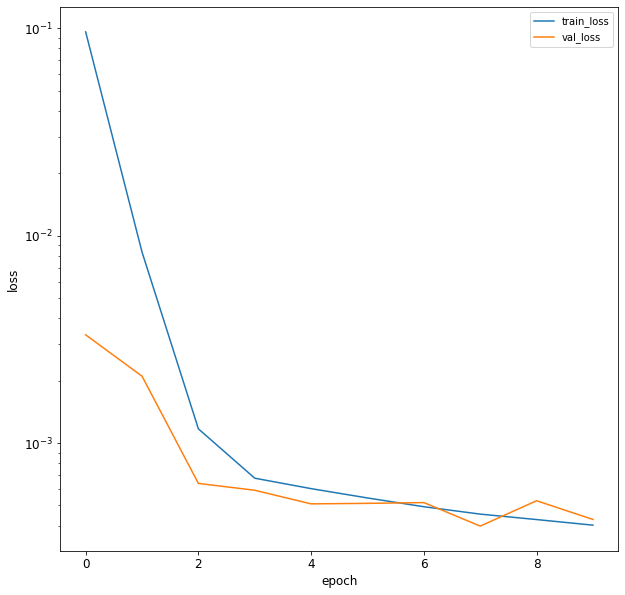

In [62]:
plot_df = pd.DataFrame.from_dict({'train_loss':history.history['loss'], 'val_loss':history.history['val_loss']})
plot_df.plot(logy=True, figsize=(10,10), fontsize=12)
plt.xlabel('epoch', fontsize=12)
plt.ylabel('loss', fontsize=12)
plt.show()

# **Evaluate the model**

In [63]:
test=pd.DataFrame(test["Average Wind Speed (m/s)"])
test_new=df[4309-T+1:4409]
test_new=pd.DataFrame(test_new["Average Wind Speed (m/s)"])

test_new['Average Wind Speed (m/s)']=scaler.transform(test_new)

test_shifted = test_new.copy()
test_shifted['y_t+1'] = test_shifted["Average Wind Speed (m/s)"].shift(-1)
print(test_shifted)

for t in range(1, T+1):
    test_shifted['wind_speed_t-'+str(T-t)] = test_shifted["Average Wind Speed (m/s)"].shift(T-t)
test_shifted = test_shifted.rename(columns={"Average Wind Speed (m/s)":'Original_wind_speed'})

test_shifted = test_shifted.dropna(how='any')
y_test = np.array(test_shifted["y_t+1"])
X_test=np.array(test_shifted[['wind_speed_t-'+str(T-t) for t in range(1, T+1)]])
X_test = X_test.reshape(X_test.shape[0], T, 1)

                 Average Wind Speed (m/s)  y_t+1
Date & Time                                     
8/31/2021 6:40                       0.44   0.42
8/31/2021 6:50                       0.42   0.43
8/31/2021 7:00                       0.43   0.45
8/31/2021 7:10                       0.45   0.46
8/31/2021 7:20                       0.46   0.47
...                                   ...    ...
8/31/2021 23:20                      0.67   0.64
8/31/2021 23:30                      0.64   0.60
8/31/2021 23:40                      0.60   0.62
8/31/2021 23:50                      0.62   0.62
9/1/2021  0:00                       0.62    nan

[105 rows x 2 columns]


In [65]:
y_test.shape

(99, 1)

In [66]:
X_test.shape

(99, 6, 1)

**Make predictions on test set**

In [67]:
predictions = model.predict(X_test)
predictions

array([[0.48],
       [0.49],
       [0.51],
       [0.52],
       [0.5 ],
       [0.5 ],
       [0.5 ],
       [0.49],
       [0.48],
       [0.49],
       [0.5 ],
       [0.51],
       [0.51],
       [0.54],
       [0.54],
       [0.54],
       [0.57],
       [0.57],
       [0.56],
       [0.56],
       [0.56],
       [0.55],
       [0.55],
       [0.55],
       [0.56],
       [0.57],
       [0.58],
       [0.58],
       [0.56],
       [0.56],
       [0.56],
       [0.55],
       [0.53],
       [0.52],
       [0.51],
       [0.51],
       [0.51],
       [0.51],
       [0.51],
       [0.51],
       [0.51],
       [0.51],
       [0.5 ],
       [0.5 ],
       [0.49],
       [0.5 ],
       [0.52],
       [0.56],
       [0.58],
       [0.6 ],
       [0.61],
       [0.63],
       [0.64],
       [0.65],
       [0.66],
       [0.66],
       [0.65],
       [0.65],
       [0.67],
       [0.66],
       [0.67],
       [0.69],
       [0.7 ],
       [0.7 ],
       [0.72],
       [0.72],
       [0.

In [68]:
predictions=pd.DataFrame(predictions)
predictions

,0
0,0.48
1,0.49
2,0.51
3,0.52
4,0.50
...,...
94,0.70
95,0.68
96,0.65
97,0.62


In [69]:
eval_df = pd.DataFrame(predictions, columns=['t+'+str(t) for t in range(1, HORIZON+1)])
eval_df['timestamp'] = test_shifted.index
eval_df = pd.melt(eval_df, id_vars='timestamp', value_name='prediction', var_name='h')
eval_df['actual'] = np.transpose(y_test).ravel()
eval_df['prediction'] =predictions 
eval_df

,timestamp,h,prediction,actual
0,8/31/2021 7:30,t+1,0.48,0.49
1,8/31/2021 7:40,t+1,0.49,0.51
2,8/31/2021 7:50,t+1,0.51,0.51
3,8/31/2021 8:00,t+1,0.52,0.49
4,8/31/2021 8:10,t+1,0.50,0.50
...,...,...,...,...
94,8/31/2021 23:10,t+1,0.70,0.67
95,8/31/2021 23:20,t+1,0.68,0.64
96,8/31/2021 23:30,t+1,0.65,0.60
97,8/31/2021 23:40,t+1,0.62,0.62


**Compute the mean absolute percentage error over all predictions**

In [70]:
def mape(actual, pred): 
    actual, pred = np.array(actual), np.array(pred)
    return np.mean(np.abs((actual - pred) / actual)) * 100

actual = eval_df['actual']
pred = eval_df['prediction']

mape(actual, pred)

2.2214092086494457

**Plot the predictions vs the actuals for the test data**

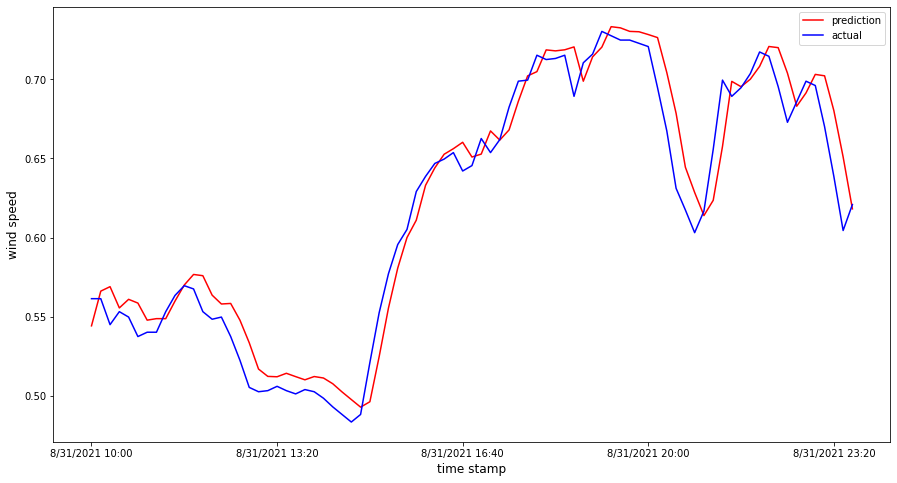

In [73]:
eval_df[eval_df.timestamp<'8/31/2021 23:50'].plot(x='timestamp', y=['prediction', 'actual'], style=['r', 'b'], figsize=(15, 8))
plt.xlabel('time stamp', fontsize=12)
plt.ylabel('wind speed', fontsize=12)
plt.show()